NLP Tutorial: Text Classification Using Spacy Word Embeddings
Problem Statement
Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

Fake news spreads faster than real news and creates problems and fear among groups and in society.

We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

Dataset
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This data consists of two columns. - Text - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [2]:
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [4]:
# add new column which gives a unique number to each of these labels 


df['label_num'] = df['label'].map({'Fake':0,'Real':1})

df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [7]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    df.vector,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [9]:
import numpy as np 

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_train_embed = scaler.fit_transform(X_train_2d)
scaler_test_embed = scaler.transform(X_test_2d)

clf = MultinomialNB()

clf.fit(scaler_train_embed, y_train)

MultinomialNB()

In [13]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaler_test_embed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1024
           1       0.94      0.95      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

clf.fit(X_train_2d, y_train)

# 3. get the predictions for all tets embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



#### Confusion metrcis



In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1011,   13],
       [   5,  951]])

Text(50.722222222222214, 0.5, 'Truth')

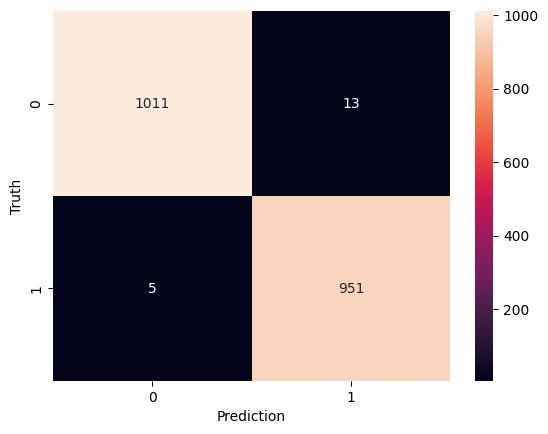

In [17]:
from matplotlib import pyplot as plt 
import seaborn as sn

sn.heatmap(cm, annot= True, fmt='d')

plt.xlabel('Prediction')
plt.ylabel('Truth')






